In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


1. Given the dataset perform the following operations

A. Find the count of unique teams, unique colleges.
B. Find outliers in age , height or weight.
C. Find correlation matrix between position and salary .
D. Describe each variable with detailed statistics.
E. Find all names in the age group of 20-22.
F. Identify the number of people in age brackets 20-22,23-25,25-27,27-30 and greater than 30.
G. List the names who earn the maximum salary in the dataset.
H. Find all details of people have an average weight.
I. For each team plot the average weight, age and salary.
J. Plot the college wise distribution of position.

In [ ]:

import pandas as pd
import numpy as np
df=pd.read_csv('nba.csv')
df



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [ ]:
#A>

print("No of unique teams:",df['Team'].nunique)
print("No of unique teams:",df['College'].nunique)


No of unique teams: <bound method IndexOpsMixin.nunique of 0      Boston Celtics
1      Boston Celtics
2      Boston Celtics
3      Boston Celtics
4      Boston Celtics
            ...      
453         Utah Jazz
454         Utah Jazz
455         Utah Jazz
456         Utah Jazz
457               NaN
Name: Team, Length: 458, dtype: object>
No of unique teams: <bound method IndexOpsMixin.nunique of 0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4                    NaN
             ...        
453               Butler
454                  NaN
455                  NaN
456               Kansas
457                  NaN
Name: College, Length: 458, dtype: object>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


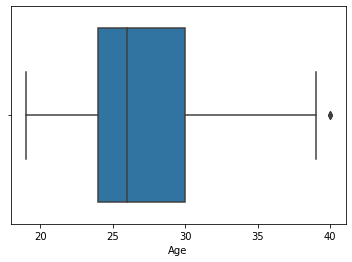

In [ ]:
#B>
import seaborn as sb
sb.boxplot(df['Age'])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


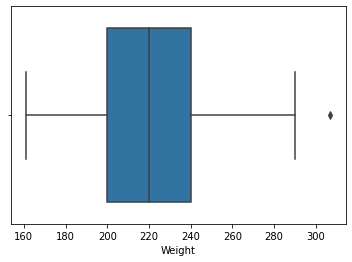

In [ ]:
sb.boxplot(df['Weight'])

In [ ]:
#C>
A= df[['Position', 'Salary']]
Pfactorized = pd.Series(pd.factorize(A['Position'])[0])
A['Position'] = Pfactorized
df.corr()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.112386
Age,0.028724,1.000000,0.087183,0.213459
Weight,0.206921,0.087183,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


In [ ]:
df.describe()

In [ ]:
#D>
df[['Name']].describe()

,Name
count,457
unique,457
top,Jerian Grant
freq,1


In [ ]:
df[['Team']].describe()

,Team
count,457
unique,30
top,New Orleans Pelicans
freq,19


In [ ]:
df[['Number']].describe()

,Number
count,457.000000
mean,17.678337
std,15.966090
min,0.000000
25%,5.000000
50%,13.000000
75%,25.000000
max,99.000000


In [ ]:
df[['Position']].describe()

,Position
count,457
unique,5
top,SG
freq,102


In [ ]:
df[['Age']].describe()

,Age
count,457.000000
mean,26.938731
std,4.404016
min,19.000000
25%,24.000000
50%,26.000000
75%,30.000000
max,40.000000


In [ ]:
df[['Height']].describe()

,Height
count,457
unique,18
top,6-9
freq,59


In [ ]:
df[['Weight']].describe()

,Weight
count,457.000000
mean,221.522976
std,26.368343
min,161.000000
25%,200.000000
50%,220.000000
75%,240.000000
max,307.000000


In [ ]:
df[['College']].describe()

,College
count,373
unique,118
top,Kentucky
freq,22


In [ ]:
df[['Salary']].describe()

,Salary
count,4.460000e+02
mean,4.842684e+06
std,5.229238e+06
min,3.088800e+04
25%,1.044792e+06
50%,2.839073e+06
75%,6.500000e+06
max,2.500000e+07


In [ ]:
#E>
df[df['Age'].between(20,22)]['Name']


3          R.J. Hunter
6        Jordan Mickey
8         Terry Rozier
9         Marcus Smart
13         James Young
            ...       
422      Cameron Payne
427    Cliff Alexander
441        Noah Vonleh
445         Dante Exum
452         Trey Lyles
Name: Name, Length: 64, dtype: object

In [ ]:
#F>
A = [20,22,23,25,27,30]
df['Age'].value_counts(bins=A)



(23.0, 25.0]      92
(27.0, 30.0]      90
(25.0, 27.0]      77
(19.999, 22.0]    64
(22.0, 23.0]      41
Name: Age, dtype: int64

In [ ]:
#G>
df['Name'][df['Salary']==df['Salary'].max()].values


array(['Kobe Bryant'], dtype=object)

In [ ]:
#H>
A= int(df['Weight'].mean())
df[df['Weight']== A]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
29,Thaddeus Young,Brooklyn Nets,30.0,PF,27.0,6-8,221.0,Georgia Tech,11235955.0


In [ ]:
#I>
df.groupby(['Team'])[['Weight','Age','Salary']].mean()

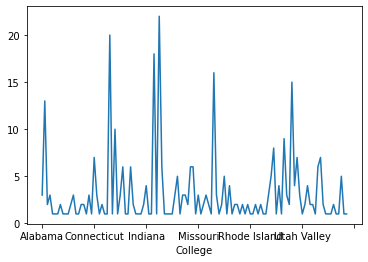

In [ ]:
#J>
df.groupby(['College']).count()['Position'].plot()